Given some data about fruits and we want to label it automatically.
Fruits are characterized by
1. weight in grams as float
2. color as an integer [1 -> red, 2 -> orange, 3 -> yellow, 4 -> green, 5 -> blue, 6 -> purple]
3. label as string ["A" -> Apple, "B" -> Banana]
We are given some sample data such as (303, 3, "A") meaning the fruit with 303 gram weight, and yellow colour is an apple.
A set of such training examples is given in “01-train.csv”. This has a small set of 17 labeled examples. 
We are given a set of test data where only weight and colour are given, eg. (373,1).
We should design a simple SVM classifier that will find the fruit label. i.e., "A" or "B", meaning Apple or Banana. 
We have 102 such testcases. We are also given additional files which have the correct labels for all the 102 test cases.
Here are the details of all the files:

01-train.csv ⇒ The original input data. 
18 lines
the first line is a header
each of the remaining 17 lines has three pieces of data:
weight in grams :: float
colour code :: 1, 2, 3, 4, 5 
label :: "A", "B"

01-test1.csv ⇒ The first test data set.
31 lines
the first line is a header
each of the remaining 30 lines has two pieces of data
weight in grams :: float
colour code :: 1, 2, 3, 4, 5

01-test1-labels.csv ⇒ The labels for test data set above. That is, each line has just the correct label.

01-test1-labelled.csv ⇒ The above two files combined. 

01-test2.csv ⇒ The second test data set. Similar to the first data set, except that it has 73 lines.

01-test2-labels.csv ⇒ The labels for test data set above. That is, each line has just the correct label.

01-test2-labelled.csv ⇒ The above two files combined. 

In [1]:
import pandas as pd
train = pd.read_csv("01-train.csv")
print(train)

    Weight  Colour Label
0      303       3     B
1      370       1     A
2      298       3     B
3      277       3     B
4      377       4     A
5      299       3     B
6      382       1     A
7      374       4     A
8      303       4     B
9      309       3     B
10     359       1     A
11     366       1     A
12     311       3     B
13     302       3     B
14     373       4     A
15     305       3     B
16     371       3     A


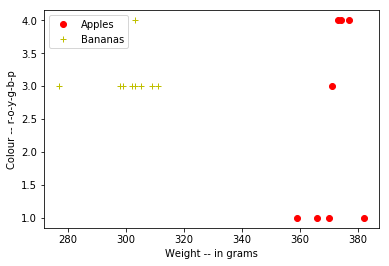

In [2]:
apples = train[train.Label == "A"]
bananas = train[train.Label == "B"]
import matplotlib.pyplot as plt
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.show()

In [24]:
data = train.values
X = []
y= []
for i in range(data.shape[0]):
    dummy = []
    for j in range(data.shape[1]):
        if(j == data.shape[1]-1):
            y.append(data[i][j])
        else:
            dummy.append(data[i][j])
    X.append(dummy)

In [25]:
print(X[0],X[1])
print(y[0],y[1])
print(data[0],data[1])

([303L, 3L], [370L, 1L])
('B', 'A')
(array([303L, 3L, 'B'], dtype=object), array([370L, 1L, 'A'], dtype=object))


In [26]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
#test sample
result = svc.predict([[303,3],[318.1,3]])
print(result[0],result[1])

('B', 'A')


In [29]:
#testset
testData = pd.read_csv("01-test1.csv").values
testLabels = pd.read_csv("01-test1-labels.csv").values.flatten()

test = []
for i in range(testData.shape[0]):
    dummy = []
    for j in range(testData.shape[1]):
        dummy.append(testData[i][j])
    test.append(dummy)

In [31]:
print(testData[0],testData[1])
print(test[0],test[1])
print(testLabels[0])

(array([ 318.1,    3. ]), array([ 293.8,    3. ]))
([318.10000000000002, 3.0], [293.80000000000001, 3.0])
B


In [45]:
#predicting accuracy
count = 0
for i in range(testData.shape[0]):
    result = svc.predict([test[i]])
    #print(test[i],result,result[0],testLabels[i],count)
    if(result[0] == testLabels[i]):
        count +=1
    #break
print("Accuracy is: ", (float(count)/testData.shape[0])*100)

('Accuracy is: ', 63.33333333333333)
